In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [ ]:
np.random.seed(42)

Part 1D. Linear regression

In [ ]:
num_points = 100
a = 2
b = 6
noise = np.random.normal(0, 1, num_points)
x = np.random.uniform(0, 5, num_points)
y = a * x + b + noise

In [ ]:
plt.scatter(x, y, marker = '.', color = 'g')
plt.plot()
plt.plot(x, a* x + b)

In [ ]:
a = 0
b = 0

alpha = 0.1
epochs = 1000

for i in range(epochs): 

    a = a - alpha * (-2/num_points) * sum(x * (y - a* x - b))
    b = b - alpha * (-2/num_points) * sum(y - a* x - b)
    
print (a, b)


Part 2D. Logistic Regression

In [661]:
num_points = 100

x1 = np.random.multivariate_normal([0, 0], [[1, .6],[.6, 1]], num_points)
x2 = np.random.multivariate_normal([1, 4], [[1, .6],[.6, 1]], num_points)

X_0 = np.concatenate([x1, x2])
Y = np.hstack((np.zeros(num_points), np.ones(num_points)))

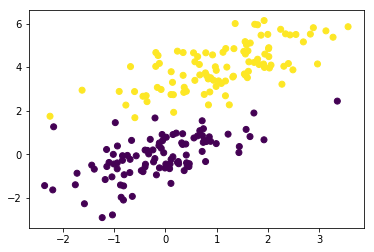

In [662]:
plt.scatter(X_0[:, 0], X_0[:, 1], c = Y)

In [663]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [664]:
X = np.insert(X_0,0,1, axis = 1)

In [665]:
bound = np.random.rand(len(X)) <= 0.5
X_train, X_test, Y_train, Y_test = X[bound], X[~bound], Y[bound], Y[~bound]

In [666]:
m = X_train.shape[0]
theta_init = np.array([0.5, 0.7, 0.3])
theta = theta_init

In [667]:
epochs = 1000
alpha = 0.1
for i in range(epochs):
    for j in range(len(theta)):
        pred = sigmoid(X_train @ theta)
        #print(X_train @ theta)
        theta[j] = theta[j] - alpha * 1/m * sum((pred - Y_train) * X_train[:, j])

print(f"theta = {theta}")


theta = [-3.74650233 -0.22929752  2.41108934]


In [668]:
preds = sigmoid(X_test @ theta)
for item in range(len(preds)):
    if preds[item] >= 0.5:
        preds[item] = 1
    else:
        preds[item] = 0
accuracy = np.sum(preds == Y_test) / len(Y_test)
print(f"accuracy is {accuracy}")

accuracy is 0.979381443298969
